In [1]:
from shortstraw import short_straw
import numpy as np 
from PIL import Image, ImageDraw, ImageFont
import json
import matplotlib.pyplot as plt

In [2]:
with open("example_sketches.json") as f:
    data = json.load(f)

In [3]:
#Function to draw a sketch
def draw_sketch(paths,colour=(0,0,0),bg=(255,255,255),strength=4):
    
    sketch = Image.new('RGBA',(750,750),bg)
    draw = ImageDraw.Draw(sketch)
    #Draw each path as a continous 
    for j,path in enumerate(paths):
        points = len(path[0])
        for i in range(points):
            if i > 0:
                prev_x = path[0][i-1]
                prev_y = path[1][i-1]
                x = path[0][i]
                y = path[1][i]
                if type(colour) is tuple:
                    paint = colour
                else:
                    paint = colour[j][i]
                draw.line((prev_x,prev_y,x,y),fill=paint,width=strength)
    return sketch

In [9]:
# Select sketch from example dataset
example = data["impact"]

In [11]:
np.shape(example)

/Users/sebastian/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


(2, 3)

In [5]:
#  Run shortstraw algorithm
all_corners, all_curves, feature_info, resampled_data, all_raw_angles, all_raw_curves = short_straw(example)

In [6]:
# Display feature information
for key in feature_info:
    print("Number of {key}: {number}".format(key=key,number=feature_info[key]))

Number of straight: 0
Number of narrow_curve: 2
Number of wide_curve: 7
Number of obtuse: 9
Number of right: 1
Number of acute: 3


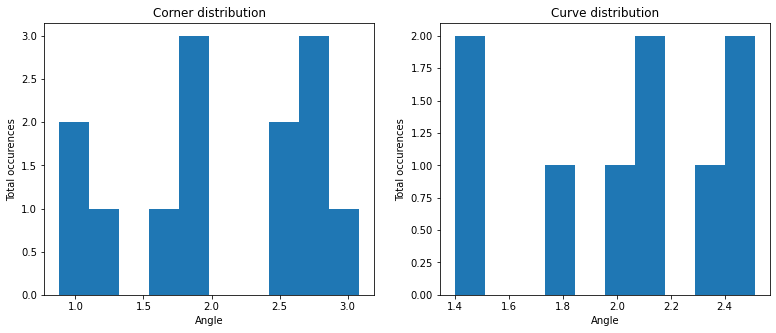

In [7]:
# Display distrubtions of raw corner and curve data
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(13, 5))
axes[0].set_title("Corner distribution")
axes[0].set_xlabel("Angle")
axes[0].set_ylabel("Total occurences")
axes[0].hist(all_raw_angles)
axes[1].set_title("Curve distribution")
axes[1].set_xlabel("Angle")
axes[1].set_ylabel("Total occurences")
axes[1].hist(all_raw_curves)

plt.show()

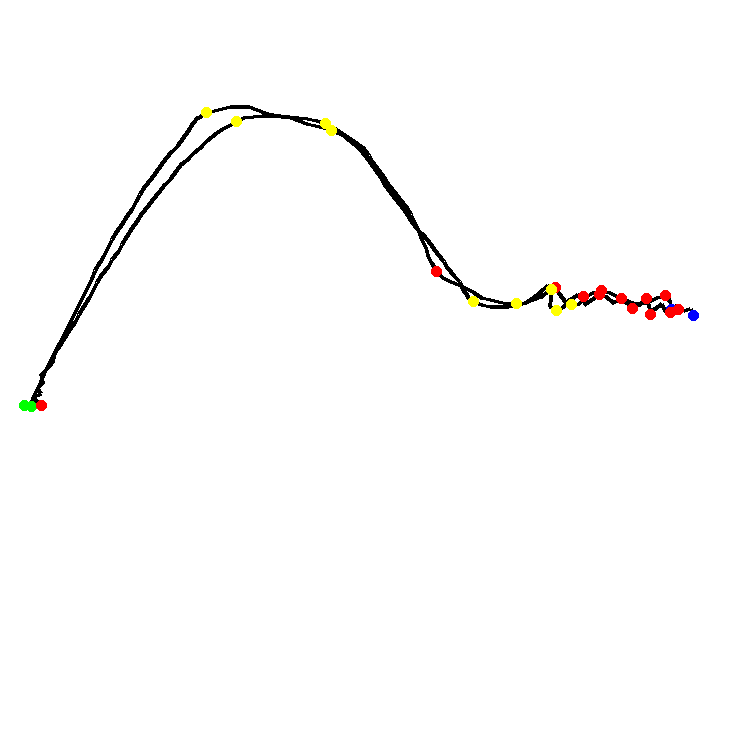

In [8]:
#Draw resampled version of sketch
resampled_sketch = draw_sketch(resampled_data)
draw = ImageDraw.Draw(resampled_sketch)

#Draw start, end, corner and curve points 
for path_i,path in enumerate(resampled_data):
    for point_i,_ in enumerate(path[0]):
        colour = False
        # Start points are green
        if point_i == 0:
            colour = (0,255,0)
        # End points are blue
        elif point_i == len(path[0])-1:
            colour = (0,0,255)
        # Corner points are red
        elif point_i in all_corners[path_i]:
            colour = (255,0,0)
        # Curve points are yellow
        elif point_i in all_curves[path_i]:
            colour = (255,255,0)
        # Draw points
        if colour:
            x = path[0][point_i]
            y = path[1][point_i]
            draw.ellipse((x-5,y-5,x+5,y+5),fill=colour)       
        
resampled_sketch